### Contours Detection

Contours are like the Edges, but there are some differences.<br>
Both techniques are used for determining structural outlines of an object. <br>
Edge detection just gives points where image intensity changes drastically.<br>
It may or may not form a closed shape. <br>The main objective of contour detection is find a closed shape and draw the boundary of the object

In [ ]:
# import requirement
import cv2
import numpy as np

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 1)
    hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([38, 86, 0])
    upper_blue = np.array([121, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    for contour in contours:

        area = cv2.contourArea(contour)

        if area > 1500:
            cv2.drawContours(frame, contour, -1, (0, 255, 0), 2)


    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
    key = cv2.waitKey(1)
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

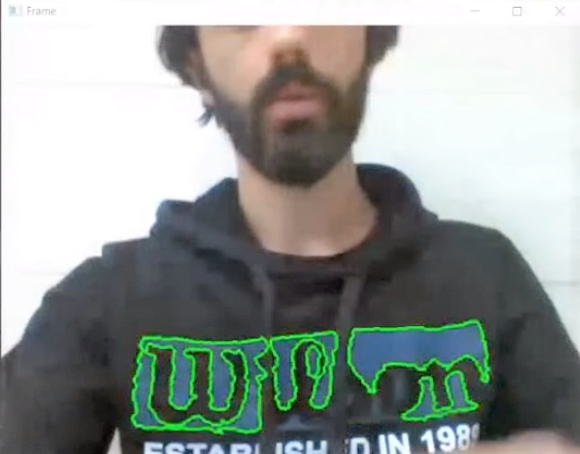